<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_AnalisisdeDatosEnPython/blob/main/Ev3_Resuelta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluación 3:
Instrucciones

Descargar el archivo de Excel llamado “Datos.xls”  ubicado en la sección de "Bienvenida" del curso.
Leer atentamente las preguntas.
Realizar cálculos, desarrollos y análisis en base al archivo.
Las respuestas que debes seleccionar están asociadas a los códigos o resultados que obtendrás del trabajo con el archivo.

In [20]:
# Incorporamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

In [21]:
# Incorporamos las pestañas de excel como datos

#Creamos GRD
GRD_sheet = pd.read_excel('Datos.xls',sheet_name='GRD')

#Creamos Hospitales
Hosp_sheet = pd.read_excel('Datos.xls',sheet_name='Hospitales')

#Creamos Informaciones
Info_sheet = pd.read_excel('Datos.xls',sheet_name='Información Histórica')

In [22]:
#Arreglamos los campos
Hosp_sheet['Nombre Servicio de Salud'] = Hosp_sheet['Nombre Servicio de Salud'].str.strip()

Pregunta 1
¿Cuál código permite hacer un gráfico de línea de las llegadas históricas del GRD4 en el hospital San Juan de Dios?  

<Axes: xlabel='Día de llegada'>

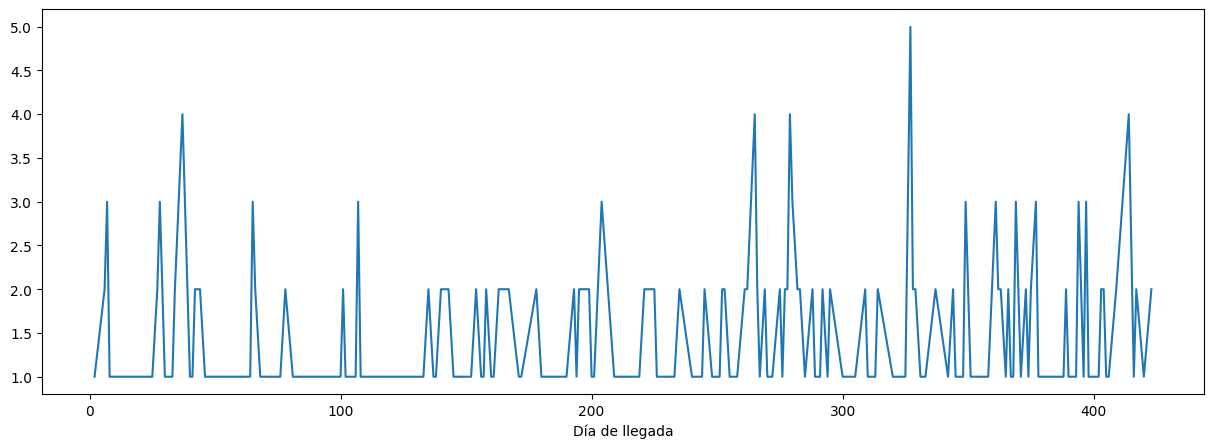

In [8]:
apoyo1 = Info_sheet.loc[(Info_sheet["Hospital al que llega"] == "Hospital San Juan de Dios") & (Info_sheet["GRD"] == "GRD4")]

apoyo1 = apoyo1[["Hospital al que llega", "Día de llegada"]].groupby("Día de llegada").count()

apoyo1.plot(kind="line", legend = None, figsize = (15,5))

Pregunta 2:
¿Cuál de las siguientes alternativas corresponde al código que permite construir un gráfico de línea con las llegadas históricas por día para el GRD4? (y entonces, agrupando cada día las llegadas a todos los hospitales)

<Axes: xlabel='Día de llegada'>

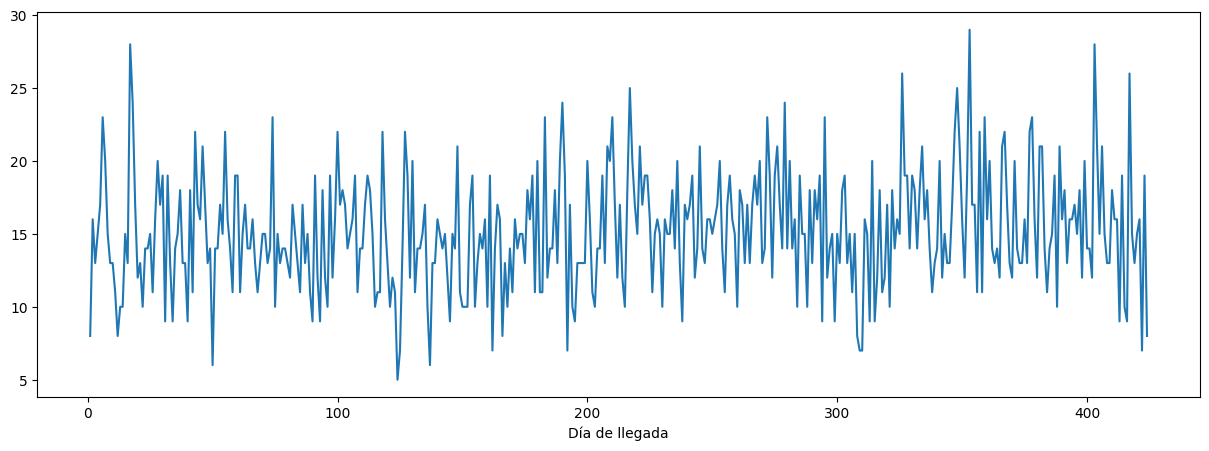

In [9]:
apoyo2 = Info_sheet.loc[Info_sheet["GRD"] == "GRD4"]

apoyo2 = apoyo2[["Hospital al que llega", "Día de llegada"]].groupby("Día de llegada").count()

apoyo2.plot(kind="line", legend = None, figsize = (15,5))

Pregunta 3
¿Qué código permite hacer un gráfico de línea para las llegadas históricas en toda la red?  

<Axes: xlabel='Día de llegada'>

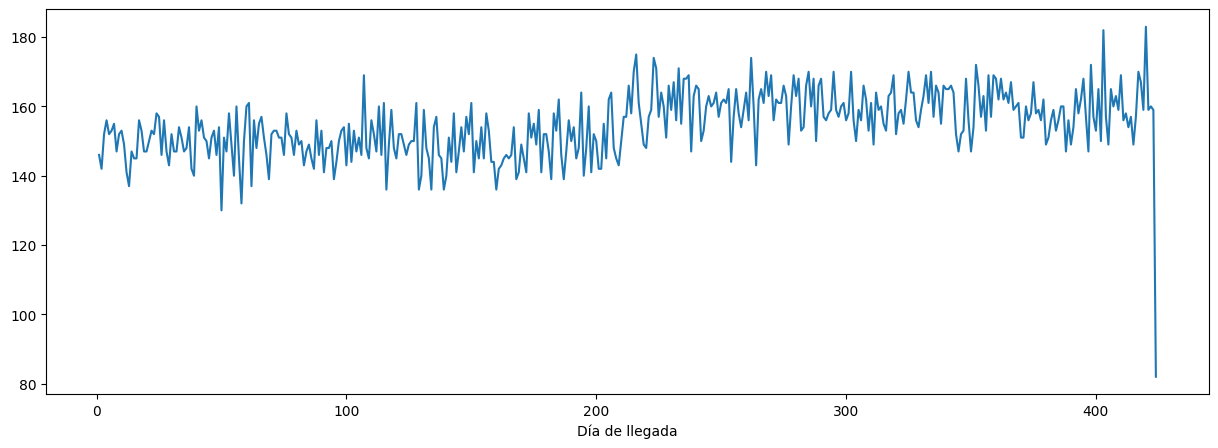

In [10]:

apoyo3 = Info_sheet[["Hospital al que llega", "Día de llegada"]].groupby("Día de llegada").count()

apoyo3.plot(kind="line", legend = None, figsize = (15,5))

Pregunta 4
¿Cuál código (es una parte) permite hacer un gráfico de línea para mostrar simultáneamente, llegadas históricas del GRD 3 y GRD4 para toda la red?  

In [15]:
apoyo4a = Info_sheet.loc[Info_sheet["GRD"] == "GRD4"]

apoyo4a = apoyo4a[["Hospital al que llega", "Día de llegada"]].groupby("Día de llegada").count()

apoyo4b = Info_sheet.loc[Info_sheet["GRD"] == "GRD3"]

apoyo4b = apoyo4b[["Hospital al que llega", "Día de llegada"]].groupby("Día de llegada").count()

Pregunta 5:
Al mirar un gráfico del tipo boxplot de la información sobre la cantidad de camas que se puede instalar en los hospitales de la red, ¿cuál de las siguientes alternativas describe mejor el valor de la mediana para estos datos?  

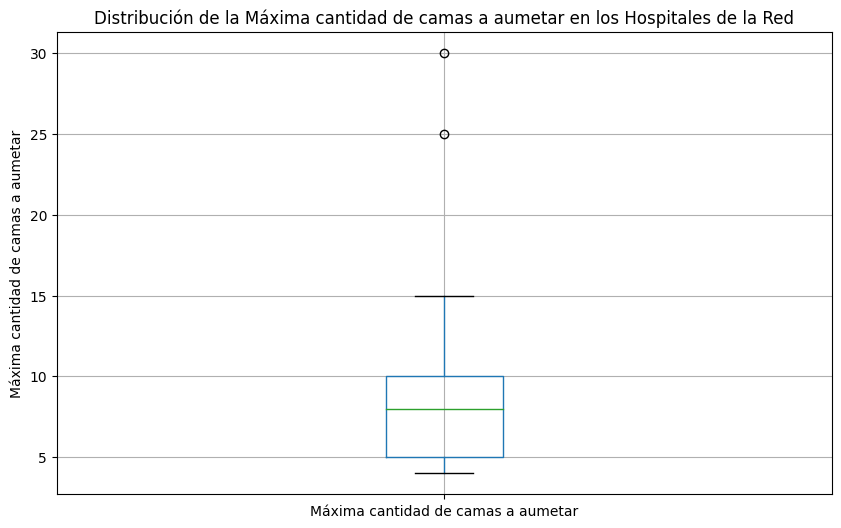

In [31]:
plt.figure(figsize=(10, 6))
Hosp_sheet.boxplot(column=['Máxima cantidad de camas a aumetar'])
plt.title('Distribución de la Máxima cantidad de camas a aumetar en los Hospitales de la Red')
plt.ylabel('Máxima cantidad de camas a aumetar')
plt.show()

# Calcular la mediana de la Máxima cantidad de camas a aumetar
mediana_camas = Hosp_sheet['Máxima cantidad de camas a aumetar'].median()

Pregunta 6: Al hacer una tabla de frecuencia sobre la cantidad total de camas críticas en los hospitales de la red, considerando intervalos de 3 en 3, ¿en cuántos intervalos hay exactamente 1 cama crítica?  

In [36]:
# Crear intervalos de 3 en 3
bins = range(0, Hosp_sheet['Total Camas Críticas'].max() + 3, 3)

# Crear una tabla de frecuencia
freq_table = pd.cut(Hosp_sheet['Total Camas Críticas'], bins=bins).value_counts().sort_index()

# Mostrar la tabla de frecuencia
print(freq_table)

# Contar los intervalos con exactamente 1 cama crítica
intervalos_con_una_cama = (freq_table == 1).sum()

Total Camas Críticas
(0, 3]      0
(3, 6]      0
(6, 9]      1
(9, 12]     0
(12, 15]    0
(15, 18]    5
(18, 21]    1
(21, 24]    3
(24, 27]    0
(27, 30]    0
(30, 33]    3
(33, 36]    0
(36, 39]    0
(39, 42]    0
(42, 45]    4
(45, 48]    1
(48, 51]    0
(51, 54]    0
(54, 57]    1
(57, 60]    0
(60, 63]    0
(63, 66]    0
(66, 69]    0
(69, 72]    0
(72, 75]    1
(75, 78]    1
Name: count, dtype: int64


Pregunta 7
¿Cuál código permite realizar un gráfico de dispersión sobre el costo de resolución en el sistema de salud privado?  


<Axes: xlabel='ID GRD', ylabel='Costo resolución en Clínica Privada [MM$]'>

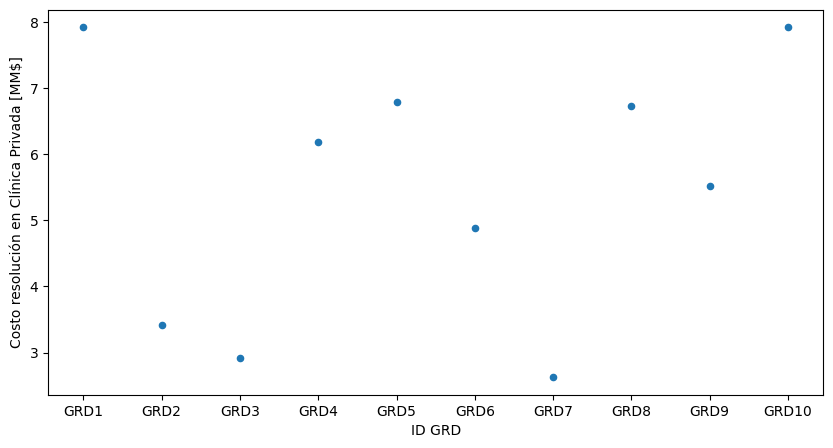

In [30]:
GRD_sheet.plot(kind = "scatter", x = "ID GRD", y = "Costo resolución en Clínica Privada [MM$]", figsize = (10,5))

Pregunta 8
¿Cuál cifra indica el porcentaje máximo de pacientes por GRD que llegaron a la red los últimos 11 días registrados?  

In [42]:
Info_sheet_sorted = Info_sheet.sort_values(by='Día de llegada', ascending=False)

# Filtrar los datos para los últimos 11 días
ultimos_11_dias = Info_sheet_sorted.head(11)

porcentaje_grd = ultimos_11_dias['GRD'].value_counts(normalize=True) * 100

# Encontrar el porcentaje máximo
porcentaje_maximo = porcentaje_grd.max()


27.27272727272727

Pregunta 9
Considerando solamente el total de pacientes atendidos (llegada de pacientes) registrado en los últimos 10 días, ¿cuál de las siguientes alternativas corresponde al código para hacer un gráfico de barras que muestre la proporción (medida en porcentaje) de pacientes con cada GRD respecto del total de pacientes?

<Axes: xlabel='GRD'>

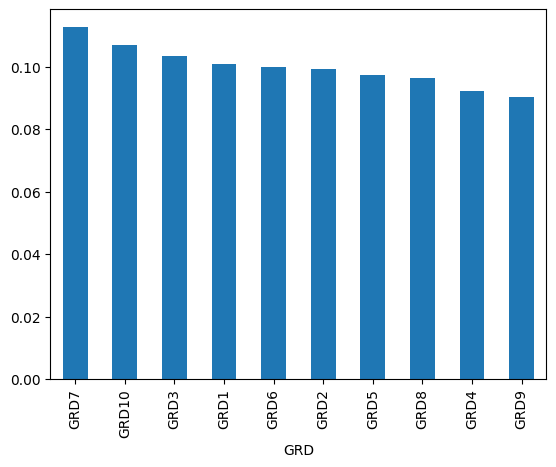

In [28]:
apoyo9 = Info_sheet.loc[Info_sheet["Día de llegada"] >= 414]

apoyo9["GRD"].value_counts(normalize = True, sort = True).plot(kind = 'bar')

<Axes: xlabel='GRD'>

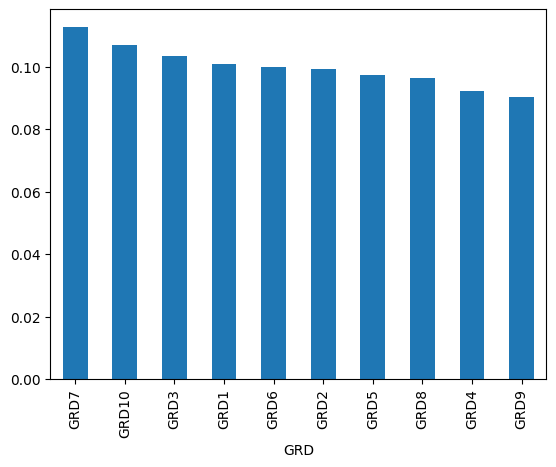

In [29]:
apoyo9 = Info_sheet[Info_sheet["Día de llegada"] >= 414]

apoyo9["GRD"].value_counts(normalize = True, sort = True).plot(kind = 'bar')

Pregunta 10
¿Cuál es el servicio de salud con mayor costo anual de operación de camas, al realizar un gráfico de barras para obtener el resultado?

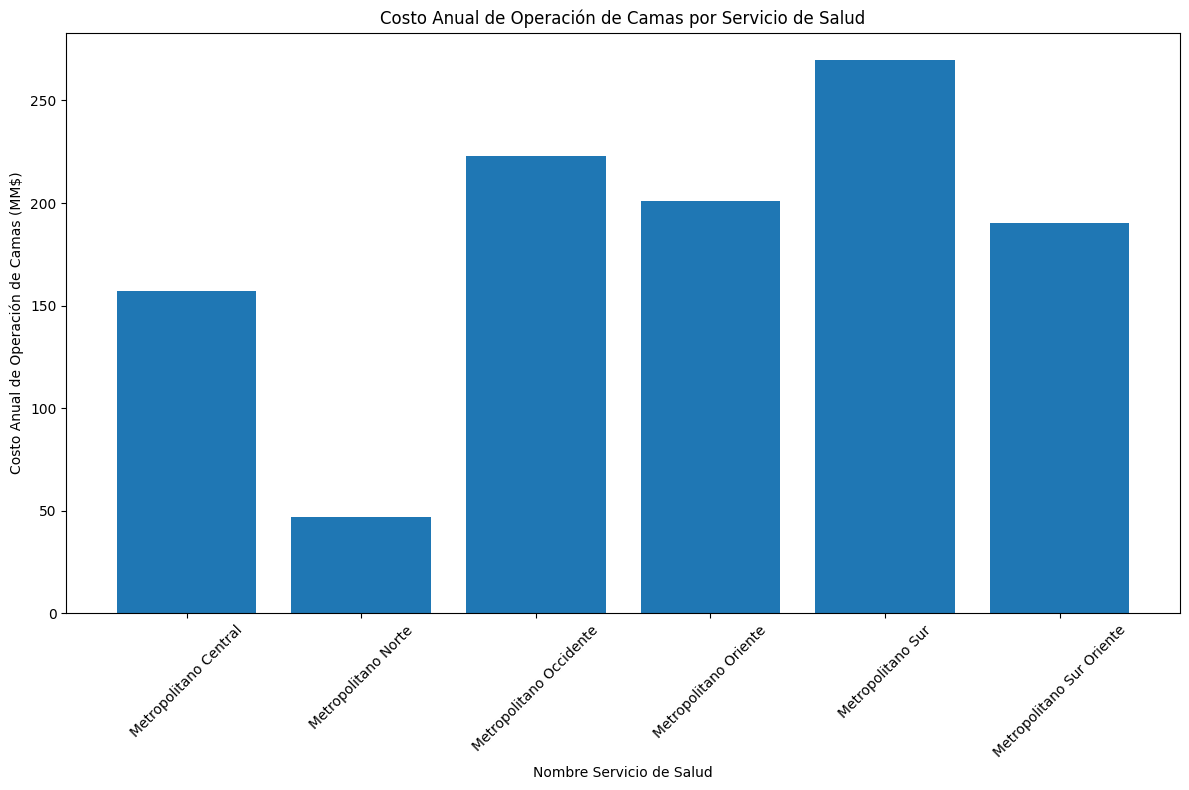

In [27]:
costo_anual_por_servicio = Hosp_sheet.groupby('Nombre Servicio de Salud')['Costo de operación anual de una cama [MM$]'].sum().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(costo_anual_por_servicio['Nombre Servicio de Salud'], costo_anual_por_servicio['Costo de operación anual de una cama [MM$]'])
plt.title('Costo Anual de Operación de Camas por Servicio de Salud')
plt.xlabel('Nombre Servicio de Salud')
plt.ylabel('Costo Anual de Operación de Camas (MM$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
